<h1>The heterogeneity and robustness of the Kuznets curve

MODELS USED
1. Descriptive statistics
2. Charts of the variables
3. Kuznets curves of environmental dev and income inequality
4. Stationary test using ADF
5. Differenced data
6. ACF and PACF
7. ARIMA, AIC, and BIC
8. OLS and GMM

HYPOTHESIS
1. Ho = kuznets curve is valid
2. Ho = data is non-stationary
3. Ho = model is not a good fit
4. 
5. 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import skew, kurtosis
import arch.unitroot as ur

In [58]:
df = pd.read_csv('canada.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('[^\\w\\s]','')
df = df.rename(columns={'time' : 'year', 'gdp_per_capita_(current_us$)_[ny.gdp.pcap.cd]' : 'gdp', 'co2_emissions_(metric_tons_per_capita)_[en.atm.co2e.pc]' : 'co2', 'gini_index_[si.pov.gini]' : 'gini'})
df = df.replace('..', np.nan).dropna()

cols = ['gdp', 'co2', 'gini']
for col in cols:
    df[col] = pd.to_numeric(df[col])

data_skewness = skew(df)
data_kurtosis = kurtosis(df)

print(f"Skewness: {data_skewness}")
print(f"Kurtosis: {data_kurtosis}")

for col in cols:
    df[col] = np.log(df[col])

df.head()

Skewness: [ 0.          0.12082244  0.28754523 -0.72091652]
Kurtosis: [-1.20266963 -1.66482441 -0.78626082 -0.87640102]


,year,gdp,co2,gini
17,1990,9.977010,2.717932,3.446808
18,1991,9.991809,2.690630,3.465736
19,1992,9.949910,2.709924,3.453157
20,1993,9.912784,2.688752,3.456317
21,1994,9.903369,2.712076,3.443618


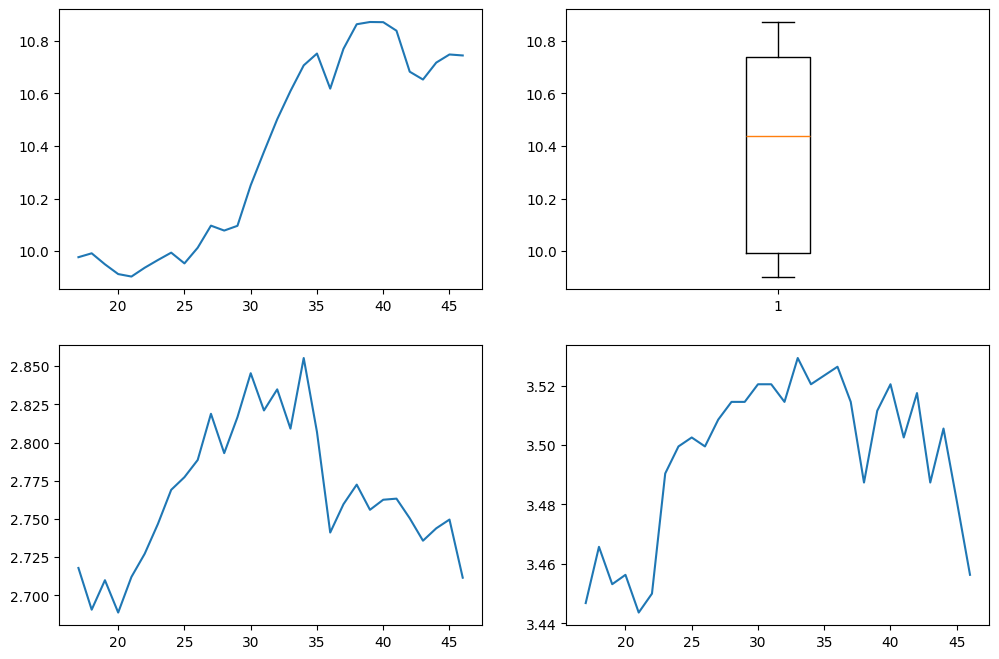

In [64]:
fig, ax = plt.subplots(2, 2, figsize = (12,8))
ax[0, 0].plot(df['gdp'])
ax[0, 1].boxplot(df['gdp'])
ax[1, 0].plot(df['co2'])
ax[1, 1].plot(df['gini'])
plt.show()

<h1>Kuznets Curve

In [5]:
df['year_group'] = df['year'] // 3 * 3
avr_df = df.groupby('year_group')[['gdp','co2', 'gini']].mean().reset_index()

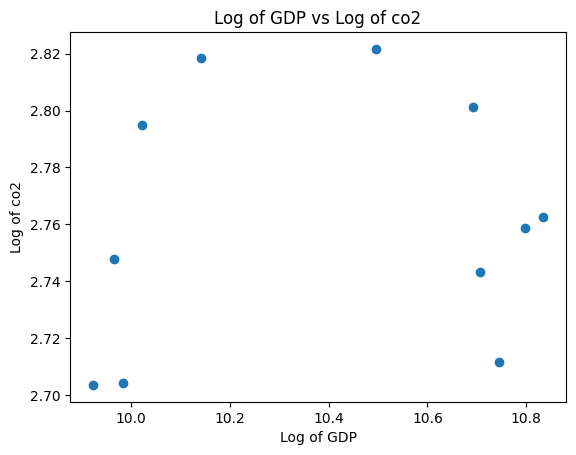

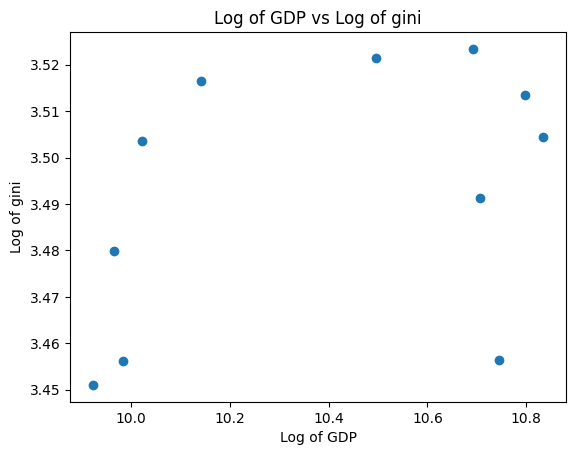

In [6]:
for i in range(2):
    plt.scatter(avr_df['gdp'], avr_df[cols[i+1]])
    plt.xlabel('Log of GDP')
    plt.ylabel(f'Log of {cols[i+1]}')
    plt.title(f'Log of GDP vs Log of {cols[i+1]}')
    plt.show()

<h1>Stationary and Non-stationary test

In [7]:
for col in cols:
    series = df[col].values
    adf_y = ur.ADF(series)
    print(adf_y.summary())
    print(f'//////////////////////////////////////////')

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.637
P-value                         0.862
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.68 (1%), -2.97 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
//////////////////////////////////////////
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.526
P-value                         0.521
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.68 (1%), -2.97 (5%), -2.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
//////////////////////////////////////////
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.916
P-value                         0.325
Lags                                0
------------------------

c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\unitroot\unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\unitroot\unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self._stat = stat = resols.tvalues[0]
c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\unitroot\unitroot.py:785: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (

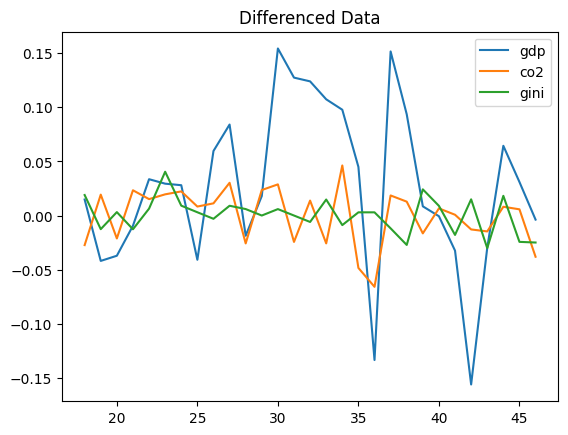

In [8]:
df_diff = df[cols].diff()
df_diff.plot()
plt.title('Differenced Data')
plt.show()

<h1>ACF and PACF

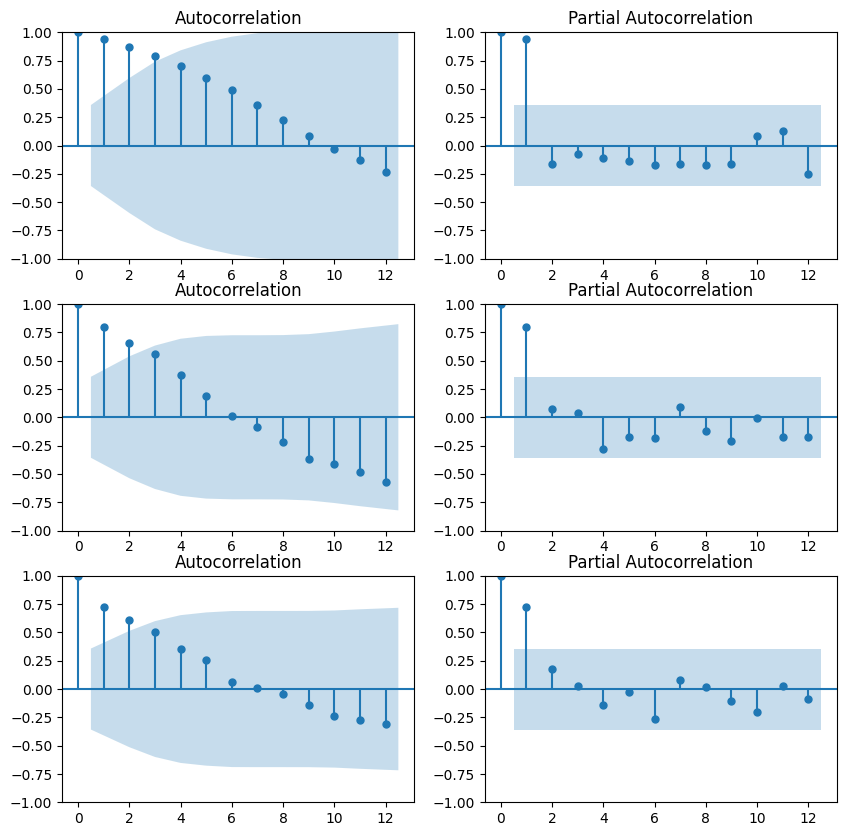

In [65]:
x = df['gdp'].values
y = df['co2'].values
z = df['gini'].values

fig, ax = plt.subplots(3, 2, figsize = (10,10))
sm.graphics.tsa.plot_acf(x, lags=12, ax=ax[0, 0])
sm.graphics.tsa.plot_pacf(x, lags=12, ax=ax[0, 1])
sm.graphics.tsa.plot_acf(y, lags=12, ax=ax[1, 0])
sm.graphics.tsa.plot_pacf(y, lags=12, ax=ax[1, 1])
sm.graphics.tsa.plot_acf(z, lags=12, ax=ax[2, 0])
sm.graphics.tsa.plot_pacf(z, lags=12, ax=ax[2, 1])
plt.show()

<h1>ARIMA, AIC and BIC

In [28]:
for i in range(1,4):
    for j in range(1,4):
        model = ARIMA(y, order=(i, 0, j))
        model_fit = model.fit()
        aic = model_fit.aic
        bic = model_fit.bic

        print(f'ARIMA {i}, 0, {j}')
        print(f"AIC: {aic}")
        print(f"BIC: {bic}")
        print(f'ARIMA: {model_fit.params}')
        print()


ARIMA 1, 0, 1
AIC: -128.09061156497052
BIC: -122.4858220383219
ARIMA: [ 2.74930966e+00  8.83055005e-01 -1.47386604e-01  6.01243935e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 1, 0, 2
AIC: -126.13754829554767
BIC: -119.1315613872369
ARIMA: [ 2.74946268e+00  8.80100394e-01 -1.76725599e-01  4.66508987e-02
  6.00020232e-04]

ARIMA 1, 0, 3
AIC: -127.17246742175382
BIC: -118.76528313178089
ARIMA: [ 2.75478180e+00  8.09518716e-01 -1.41091740e-01 -2.39952406e-03
  3.84981109e-01  5.33714896e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 2, 0, 1
AIC: -126.0992474762385
BIC: -119.09326056792773
ARIMA: [ 2.74930475e+00  8.25353521e-01  5.06693269e-02 -9.61434191e-02
  6.01025690e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 2, 0, 2
AIC: -133.0539343963118
BIC: -124.64675010633887
ARIMA: [ 2.77273347e+00  1.93053136e+00 -9.89071738e-01 -1.72948257e+00
  7.41190660e-01  3.77921546e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 2, 0, 3
AIC: -126.59961164367644
BIC: -116.79122997204135
ARIMA: [ 2.76413801e+00  1.88777342e+00 -9.28889505e-01 -1.38972441e+00
  5.17751466e-01  2.08280215e-02  4.94200564e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA 3, 0, 1
AIC: -125.92625304330213
BIC: -117.5190687533292
ARIMA: [ 2.75026234e+00 -1.63576285e-01  7.04902418e-01  2.07518423e-01
  9.86430834e-01  5.39414113e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA 3, 0, 2
AIC: -122.7388595701349
BIC: -112.93047789849982
ARIMA: [2.74859897e+00 1.86556581e-01 3.44556357e-01 2.60719864e-01
 5.52084561e-01 8.40124085e-02 5.87801290e-04]

ARIMA 3, 0, 3
AIC: -130.1910903592172
BIC: -118.98151130591997
ARIMA: [ 2.77245176e+00  1.03033200e+00  7.63571839e-01 -9.02164250e-01
 -8.71136628e-01 -9.80048409e-01  8.71607243e-01  3.32435825e-04]



c:\Users\frank\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


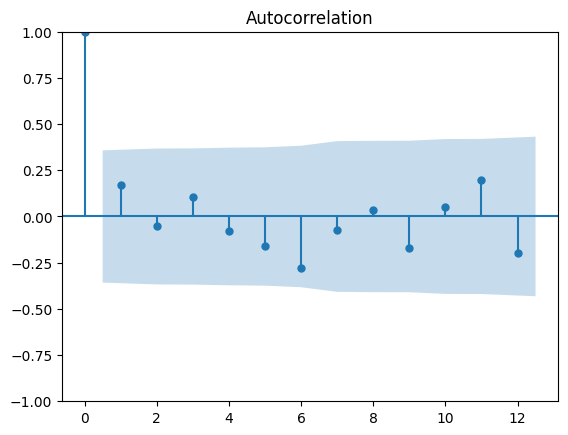

In [29]:
# Check the residuals
residuals = model_fit.resid
sm.graphics.tsa.plot_acf(residuals, lags=12)  # adjust the number of lags here
plt.show()

<h1>OLS

In [12]:
y = df['gini']
x = df['gdp']
z = df['co2']

x = sm.add_constant(x)
x["gdp2"] = x["gdp"]**2
ols_model = sm.OLS(y, x).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   gini   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     12.20
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           0.000168
Time:                        03:20:18   Log-Likelihood:                 75.917
No. Observations:                  30   AIC:                            -145.8
Df Residuals:                      27   BIC:                            -141.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4650      5.861     -2.980      0.0

In [16]:
import statsmodels.api as sm
gmm_model = sm.GMM(y, x, ols_model.params)

print(gmm_model.fit().summary())

AttributeError: module 'statsmodels.api' has no attribute 'GMM'

Interpreting the results of a regression analysis involves understanding several key statistics:

1. **Coefficients**: These are the values for the predictors in your regression equation. They represent the change in the response variable for a one-unit change in the predictor variable, assuming all other variables are held constant¹.

2. **R-squared**: This is the proportion of the variance in the response variable that can be explained by the predictor variables. It ranges from 0 to 1, with 1 indicating that the predictors perfectly explain the variation in the response variable¹.

3. **Adjusted R-squared**: This is a modified version of R-squared that adjusts for the number of predictors in the model. It is always lower than R-squared and can be useful for comparing the fit of different models¹.

4. **F-statistic and p-value**: The F-statistic tests the overall significance of the model. The null hypothesis is that all of the regression coefficients are equal to zero. If the p-value associated with the F-statistic is less than your significance level (often 0.05), you can reject the null hypothesis and conclude that your model provides a better fit than the intercept-only model.

5. **Individual predictor p-values**: These test the null hypothesis that the corresponding predictor's coefficient is zero, assuming that all other predictors are in the model. If a predictor's p-value is less than your significance level, you can conclude that the effect of that predictor is statistically significant¹.

6. **Confidence intervals**: These provide a range of values for the population parameter with a certain level of confidence. For example, a 95% confidence interval means that you can be 95% confident that the population parameter lies within that range¹.

Remember, statistical significance does not necessarily imply that the predictor is practically significant. Always consider the context and the practical implications of your findings.